In the following code, we visually demonstrate the impact of sampling on the Discrete Fourier Transform (DFT) using a sine wave as a base example. The code allows users to additionally analyze a second sine wave, or a waveform generated through amplitude modulation (AM), frequency modulation (FM), or the sum or combination of both sine waves. Dotted lines in the plots represent the time steps or sampling intervals.

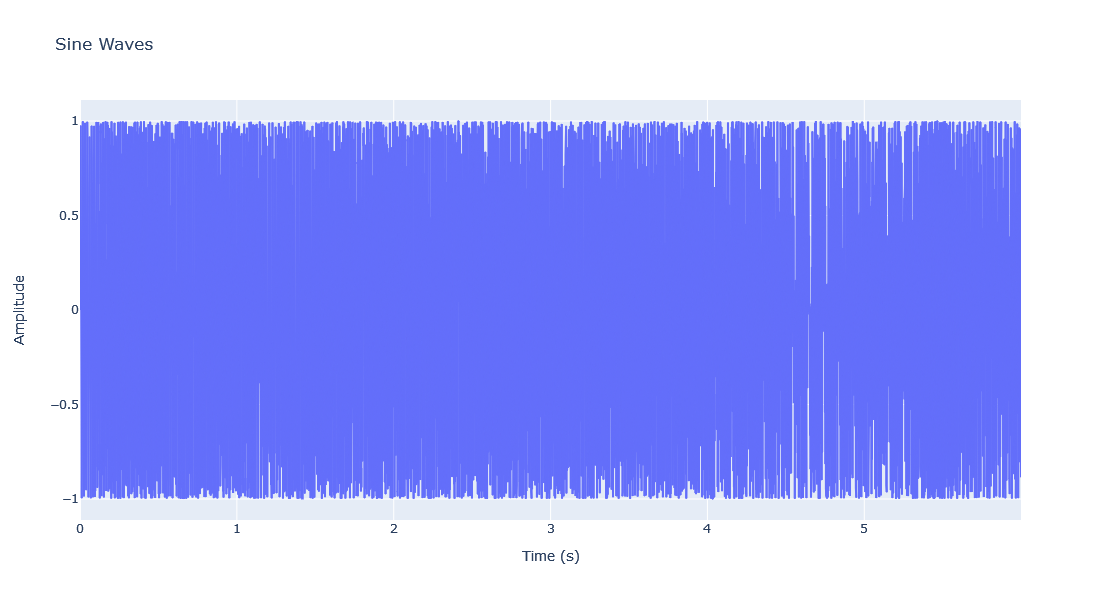

Sampling rate: 1000.0 Hz
Nyquist frequency: 500.0 Hz
Total number of available sample points: 6000


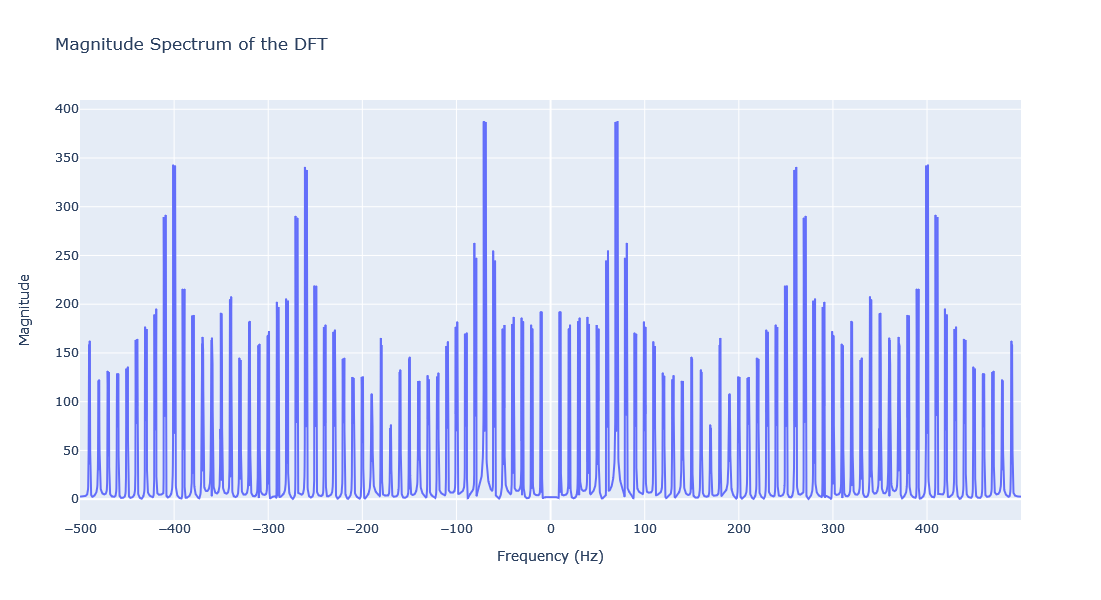

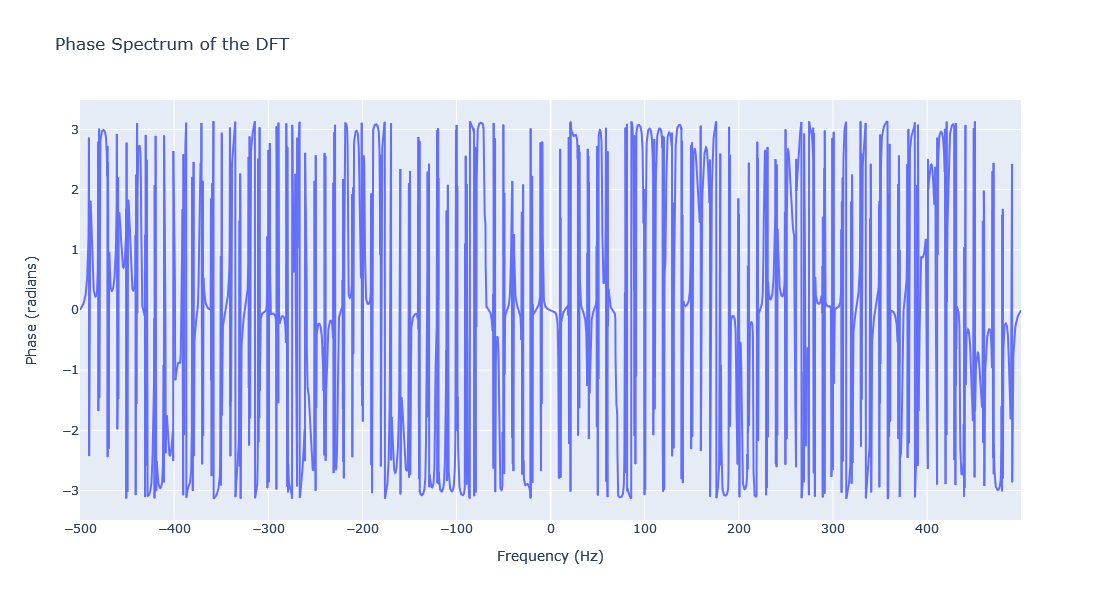

In [9]:
import numpy as np
import plotly.graph_objects as go
from waveform_utils import generate_waveforms, apply_window_to_waveforms, plot_waveforms

# Configuration
config = {
    # Time step
    'n': 0.001, 
    
    # Maximum time
    't_max': 6.0, 
    
    # Waveforms to show as list: 'sine1', 'sine2', 'am', 'fm', 'sum', 'comb'
    'selected_waveforms': ['fm'],
    
    # Parameters for sine wave 1: amp, freq, phase
    'amp1': 1.0, 'freq1': 70, 'phase1': 0*np.pi/2,
    
    # Parameters for sine wave 2: amp, freq, phase
    'amp2': 1.0, 'freq2': 330, 'phase2': 0*np.pi/2,
    
    # Set the modulation index for AM
    'index_am': 1,
    
    # Set the modulation index for FM
    'index_fm': 1,
    
    # Apply window function
    'apply_window': False,
    
    # Type of window function to apply. Reference here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html
    'window_type': 'blackman',
    
    # Add dotted lines overlay (disable if using high SR!)
    'add_dotted_lines': False
}

waveform_data = generate_waveforms(config)

if config['apply_window']:
    waveform_data = apply_window_to_waveforms(waveform_data, config['window_type'])

plot_waveforms(waveform_data, config)


In [8]:
import numpy as np
from generate_wave_file import generate_wave_file

# Initialize an array of zeros for the combined waveform
y_combined = np.zeros_like(waveform_data['t'])

# Add up all the waveforms from 'selected_waveforms'
for waveform in config['selected_waveforms']:
    y_combined += waveform_data[waveform]

# Convert any NaN values to 0
y_combined_no_nan = np.nan_to_num(y_combined)

# Ensure y_combined_no_nan is two-dimensional if needed
y_combined_no_nan = y_combined_no_nan.reshape(-1, 1)

sample_rate = 1 / config['n']

generate_wave_file(y_combined_no_nan, sample_rate, fs_target_name='44.1kHz', bit_rate=24)


[2023-09-16 12:51:15] 24-bit wave file with 44.1kHz sampling rate saved successfully to: C:\Users\egor_\Desktop\tests\audiospylt\generated_wave_file_44.1kHz_24bit_12_51_15.wav


In [10]:
import numpy as np
from generate_wave_file import generate_wave_file
from IPython.display import Audio

# Initialize an array of zeros for the combined waveform
y_combined = np.zeros_like(waveform_data['t'])

# Add up all the waveforms from 'selected_waveforms'
for waveform in config['selected_waveforms']:
    y_combined += waveform_data[waveform]

# Convert any NaN values to 0
y_combined_no_nan = np.nan_to_num(y_combined)

# Ensure y_combined_no_nan is two-dimensional if needed
y_combined_no_nan = y_combined_no_nan.reshape(-1, 1)

sample_rate = 1 / config['n']

# Flags to control behavior
player = True
save_audio = False

if save_audio:
    generate_wave_file(y_combined_no_nan, sample_rate, fs_target_name='44.1kHz', bit_rate=24)

if player:
    audio = Audio(y_combined_no_nan, rate=sample_rate)
    display(audio)
